In [67]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()


In [68]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [69]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [70]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [73]:
#shows from where target values is 1 i.e, versicolor
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [74]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
# df.head()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
# df0

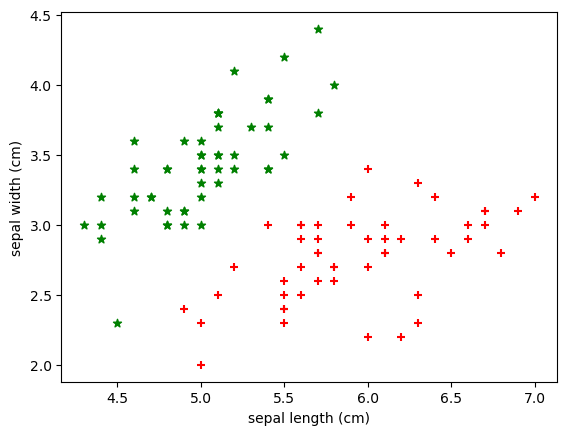

In [77]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red', marker = '+')



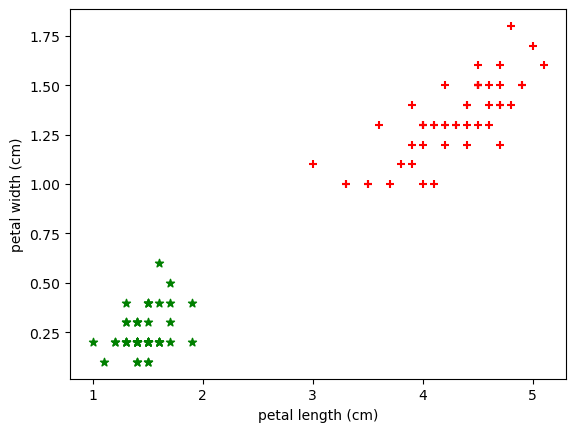

In [78]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker = '*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'red', marker = '+')


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X = df.drop(['target', 'flower_name'], axis= 'columns')

In [81]:
y = df.target

In [88]:
X_train,X_test,y_train, y_test = train_test_split(X, y ,test_size= 0.2)

In [89]:
from sklearn.svm import SVC
model = SVC()

In [90]:
model.fit(X_train, y_train)

SVC()

In [93]:
model.score(X,y)

0.9666666666666667

In [96]:
model.predict([[5,3.6,1.4,0.2]])

c:\Users\bhavy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

NameError: name 'X0' is not defined

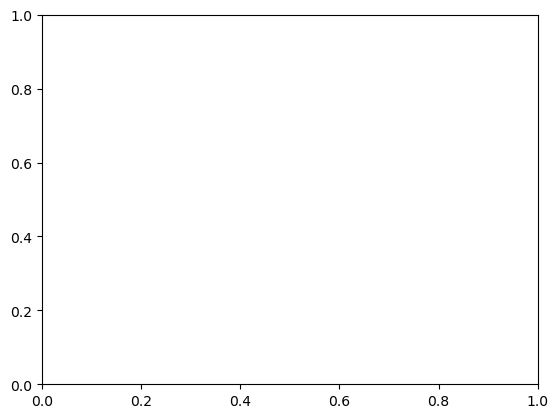

In [102]:
from sklearn import svm
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, ], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('sepal width')
ax.set_xlabel('sepal length')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()